In [ ]:
 import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
data = pd.read_csv("fifa21_trainning.csv")

In [ ]:
df = data.copy()
pd.options.display.max_columns = None
df.head()

,Unnamed: 0,ID,Name,Age,Nationality,Club,BP,Position,Team & Contract,Height,Weight,foot,Growth,Joined,Loan Date End,Value,Wage,Release Clause,Contract,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,OVA
0,1954,184383,A. Pasche,26,Switzerland,FC Lausanne-Sport,CM,CM CDM,FC Lausanne-Sport 2015 ~ 2020,"5'9""",161lbs,Right,1,"Jul 1, 2015",NaN,€525K,€4K,€801K,2015 ~ 2020,258,54,47,43,70,44.0,286,61,44.0,55,63,63,346,64,73,61.0,66,82.0,306,62,73.0,71,55,45,290,54,52.0,62.0,68.0,54,54.0,148,49,56,43.0,48,7,12,14,9,6,1682,357,4 ★,2★,High,Medium,1 ★,69,51,63,63,51,60,3,58+1,58+1,58+1,61+0,62+0,62+0,62+0,61+0,63+1,63+1,63+1,63+1,63+1,63+1,63+1,63+1,59+1,59+1,59+1,59+1,59+1,58+1,54+1,54+1,54+1,58+1,15+1,64
1,2225,188044,Alan Carvalho,30,China PR,Beijing Sinobo Guoan FC,ST,ST LW LM,"Beijing Sinobo Guoan FC Dec 31, 2020 On Loan","6'0""",159lbs,Right,0,"Jan 16, 2015","Dec 31, 2020",€8.5M,€23K,€0,"Dec 31, 2020 On Loan",365,66,79,76,68,76.0,375,83,78.0,72,63,79,404,83,83,88.0,75,75.0,372,74,81.0,75,74,68,313,54,33.0,78.0,72.0,76,70.0,77,35,20,22.0,55,11,7,14,7,16,1961,412,3 ★,4★,High,Low,2 ★,83,75,68,82,33,71,44,77+0,77+0,77+0,77+0,77+0,77+0,77+0,77+0,76+1,76+1,76+1,76+1,68+2,68+2,68+2,76+1,57+2,53+2,53+2,53+2,57+2,53+2,48+2,48+2,48+2,53+2,18+2,77
2,1959,184431,S. Giovinco,33,Italy,Al Hilal,CAM,CAM CF,Al Hilal 2019 ~ 2022,"5'4""",134lbs,Right,0,"Jan 31, 2019",NaN,€9M,€49K,€15.3M,2019 ~ 2022,336,73,76,34,78,75.0,424,85,89.0,91,74,85,424,84,76,93.0,78,93.0,308,79,34.0,75,42,78,332,75,26.0,80.0,78.0,73,82.0,80,23,29,28.0,21,6,3,6,3,3,1925,404,4 ★,4★,High,Medium,2 ★,80,77,78,86,27,56,73,73+2,73+2,73+2,80+0,79+0,79+0,79+0,80+0,80+0,80+0,80+0,79+1,74+2,74+2,74+2,79+1,59+2,56+2,56+2,56+2,59+2,53+2,41+2,41+2,41+2,53+2,12+2,80
3,9815,233796,J. Evans,22,Wales,Swansea City,CDM,CDM CM,Swansea City 2016 ~ 2021,"5'10""",152lbs,Right,13,"Jul 1, 2016",NaN,€275K,€4K,€694K,2016 ~ 2021,242,44,42,58,62,36.0,259,54,41.0,46,57,61,282,54,59,59.0,55,55.0,277,57,60.0,64,58,38,257,61,57.0,31.0,54.0,54,48.0,168,55,58,55.0,42,8,9,6,7,12,1527,329,2 ★,2★,Medium,Medium,1 ★,57,44,54,57,57,60,7,50+2,50+2,50+2,51+0,51+0,51+0,51+0,51+0,53+2,53+2,53+2,53+2,56+2,56+2,56+2,53+2,56+2,58+2,58+2,58+2,56+2,57+2,58+2,58+2,58+2,57+2,14+2,59
4,10074,234799,Y. Demoncy,23,France,US Orléans Loiret Football,CDM,CDM CM,US Orléans Loiret Football 2018 ~ 2021,"5'11""",150lbs,Right,8,"Jul 1, 2018",NaN,€725K,€2K,€1.4M,2018 ~ 2021,249,49,37,61,68,34.0,280,64,44.0,45,61,66,324,66,66,61.0,62,69.0,280,61,34.0,81,61,43,294,66,60.0,55.0,64.0,49,58.0,185,58,61,66.0,52,8,9,15,5,15,1664,360,2 ★,3★,Low,Medium,1 ★,66,44,60,64,60,66,4,56+2,56+2,56+2,59+0,59+0,59+0,59+0,59+0,61+2,61+2,61+2,62+2,63+2,63+2,63+2,62+2,64+2,64+2,64+2,64+2,64+2,63+2,61+2,61+2,61+2,63+2,15+2,65


In [ ]:
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13700 entries, 0 to 13699
Data columns (total 102 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        13700 non-null  int64  
 1   ID                13700 non-null  int64  
 2   Name              13700 non-null  object 
 3   Age               13700 non-null  int64  
 4   Nationality       13700 non-null  object 
 5   Club              13679 non-null  object 
 6   BP                13700 non-null  object 
 7   Position          13357 non-null  object 
 8   Team & Contract   13700 non-null  object 
 9   Height            13700 non-null  object 
 10  Weight            13700 non-null  object 
 11  foot              13700 non-null  object 
 12  Growth            13700 non-null  int64  
 13  Joined            13656 non-null  object 
 14  Loan Date End     739 non-null    object 
 15  Value             13700 non-null  object 
 16  Wage              13700 non-null  objec

In [ ]:
df= df.set_index("ID")
df = df.drop(["Name", "Unnamed: 0", "Position", "Team & Contract", "Loan Date End"], axis = 1)
df = df.drop(["Joined", "Contract"], axis = 1)
df = df.drop("Hits", axis = 1)
df = df.dropna()

In [ ]:
def Money_Conv(x):
    try:
        x = x.split("€")[1]
    except:
        pass
        
    if x[-1] == "K":
        x = float(x.split("K")[0])*1000
    elif x[-1] == "M":
        x = float(x.split("M")[0])*1000000
    else:
        x = float(x)
    return x

df["Value"] = df["Value"].apply(Money_Conv)
df["Wage"] = df["Wage"].apply(Money_Conv)
df["Release Clause"] = df["Release Clause"].apply(Money_Conv)
#df["Hits"] = df["Hits"].apply(Money_Conv)

In [ ]:
#Convert inches to height
df["Height"] = df["Height"].apply(lambda x: (int(x.split("'")[0]) * 12 + int(x.split("'")[1].split("\"")[0]))*2.54)
#Convert pounds to Kilos
df["Weight"] = df["Weight"].apply(lambda x: float(x.split("lbs")[0])/2.2046)

In [ ]:
#Remove The stars
df["W/F"] = df["W/F"].apply(lambda x: int(x.split("★")[0]))
df["SM"] = df["SM"].apply(lambda x: int(x.split("★")[0]))
df["IR"] = df["IR"].apply(lambda x: int(x.split("★")[0]))

In [ ]:
#Removing the "+ (num)"
for col in df.columns[65:92]:
    df[col] = df[col].apply(lambda x: int(x.split("+")[0]))

In [ ]:
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13358 entries, 184383 to 254882
Data columns (total 93 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               13358 non-null  int64  
 1   Nationality       13358 non-null  object 
 2   Club              13358 non-null  object 
 3   BP                13358 non-null  object 
 4   Height            13358 non-null  float64
 5   Weight            13358 non-null  float64
 6   foot              13358 non-null  object 
 7   Growth            13358 non-null  int64  
 8   Value             13358 non-null  float64
 9   Wage              13358 non-null  float64
 10  Release Clause    13358 non-null  float64
 11  Attacking         13358 non-null  int64  
 12  Crossing          13358 non-null  int64  
 13  Finishing         13358 non-null  int64  
 14  Heading Accuracy  13358 non-null  int64  
 15  Short Passing     13358 non-null  int64  
 16  Volleys           13358 non-null  

In [ ]:
df.head()

,Age,Nationality,Club,BP,Height,Weight,foot,Growth,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,OVA
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
184383,26,Switzerland,FC Lausanne-Sport,CM,175.26,73.029121,Right,1,525000.0,4000.0,801000.0,258,54,47,43,70,44.0,286,61,44.0,55,63,63,346,64,73,61.0,66,82.0,306,62,73.0,71,55,45,290,54,52.0,62.0,68.0,54,54.0,148,49,56,43.0,48,7,12,14,9,6,1682,357,4,2,High,Medium,1,69,51,63,63,51,60,58,58,58,61,62,62,62,61,63,63,63,63,63,63,63,63,59,59,59,59,59,58,54,54,54,58,15,64
188044,30,China PR,Beijing Sinobo Guoan FC,ST,182.88,72.121927,Right,0,8500000.0,23000.0,0.0,365,66,79,76,68,76.0,375,83,78.0,72,63,79,404,83,83,88.0,75,75.0,372,74,81.0,75,74,68,313,54,33.0,78.0,72.0,76,70.0,77,35,20,22.0,55,11,7,14,7,16,1961,412,3,4,High,Low,2,83,75,68,82,33,71,77,77,77,77,77,77,77,77,76,76,76,76,68,68,68,76,57,53,53,53,57,53,48,48,48,53,18,77
184431,33,Italy,Al Hilal,CAM,162.56,60.782001,Right,0,9000000.0,49000.0,15300000.0,336,73,76,34,78,75.0,424,85,89.0,91,74,85,424,84,76,93.0,78,93.0,308,79,34.0,75,42,78,332,75,26.0,80.0,78.0,73,82.0,80,23,29,28.0,21,6,3,6,3,3,1925,404,4,4,High,Medium,2,80,77,78,86,27,56,73,73,73,80,79,79,79,80,80,80,80,79,74,74,74,79,59,56,56,56,59,53,41,41,41,53,12,80
233796,22,Wales,Swansea City,CDM,177.80,68.946748,Right,13,275000.0,4000.0,694000.0,242,44,42,58,62,36.0,259,54,41.0,46,57,61,282,54,59,59.0,55,55.0,277,57,60.0,64,58,38,257,61,57.0,31.0,54.0,54,48.0,168,55,58,55.0,42,8,9,6,7,12,1527,329,2,2,Medium,Medium,1,57,44,54,57,57,60,50,50,50,51,51,51,51,51,53,53,53,53,56,56,56,53,56,58,58,58,56,57,58,58,58,57,14,59
234799,23,France,US Orléans Loiret Football,CDM,180.34,68.039554,Right,8,725000.0,2000.0,1400000.0,249,49,37,61,68,34.0,280,64,44.0,45,61,66,324,66,66,61.0,62,69.0,280,61,34.0,81,61,43,294,66,60.0,55.0,64.0,49,58.0,185,58,61,66.0,52,8,9,15,5,15,1664,360,2,3,Low,Medium,1,66,44,60,64,60,66,56,56,56,59,59,59,59,59,61,61,61,62,63,63,63,62,64,64,64,64,64,63,61,61,61,63,15,65


In [ ]:
df_cat = df.select_dtypes("object")
df_cat.head()

,Nationality,Club,BP,foot,A/W,D/W
ID,,,,,,
184383,Switzerland,FC Lausanne-Sport,CM,Right,High,Medium
188044,China PR,Beijing Sinobo Guoan FC,ST,Right,High,Low
184431,Italy,Al Hilal,CAM,Right,High,Medium
233796,Wales,Swansea City,CDM,Right,Medium,Medium
234799,France,US Orléans Loiret Football,CDM,Right,Low,Medium


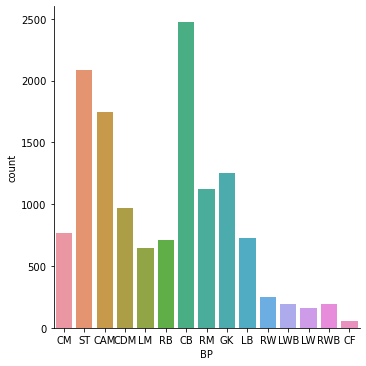

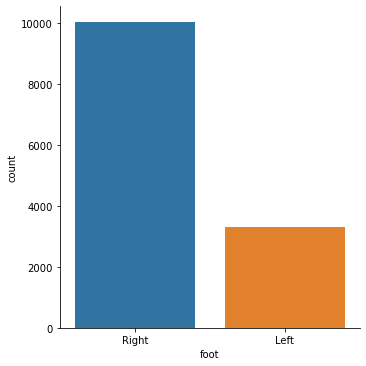

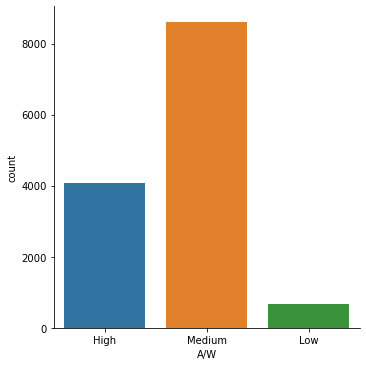

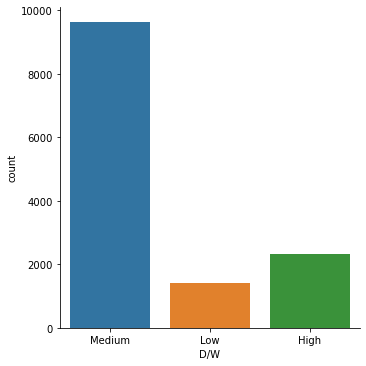

In [ ]:
for col in df_cat.columns[2:]: #Displaying Categorical Data
    sns.catplot(x = col, kind = "count", data = df_cat)
    plt.show()

In [ ]:
df_cat_dum = pd.get_dummies(df_cat,  drop_first = True)
df_cat_dum.head()

,Nationality_Albania,Nationality_Algeria,Nationality_Angola,Nationality_Antigua &amp; Barbuda,Nationality_Argentina,Nationality_Armenia,Nationality_Aruba,Nationality_Australia,Nationality_Austria,Nationality_Azerbaijan,Nationality_Barbados,Nationality_Belarus,Nationality_Belgium,Nationality_Belize,Nationality_Benin,Nationality_Bolivia,Nationality_Bosnia Herzegovina,Nationality_Brazil,Nationality_Bulgaria,Nationality_Burkina Faso,Nationality_Burundi,Nationality_Cameroon,Nationality_Canada,Nationality_Cape Verde,Nationality_Central African Republic,Nationality_Chad,Nationality_Chile,Nationality_China PR,Nationality_Chinese Taipei,Nationality_Colombia,Nationality_Comoros,Nationality_Congo,Nationality_Costa Rica,Nationality_Croatia,Nationality_Cuba,Nationality_Curacao,Nationality_Cyprus,Nationality_Czech Republic,Nationality_DR Congo,Nationality_Denmark,Nationality_Dominican Republic,Nationality_Ecuador,Nationality_Egypt,Nationality_El Salvador,Nationality_England,Nationality_Equatorial Guinea,Nationality_Eritrea,Nationality_Estonia,Nationality_Faroe Islands,Nationality_Finland,Nationality_France,Nationality_Gabon,Nationality_Gambia,Nationality_Georgia,Nationality_Germany,Nationality_Ghana,Nationality_Gibraltar,Nationality_Greece,Nationality_Grenada,Nationality_Guam,Nationality_Guinea,Nationality_Guinea Bissau,Nationality_Guyana,Nationality_Haiti,Nationality_Honduras,Nationality_Hong Kong,Nationality_Hungary,Nationality_Iceland,Nationality_India,Nationality_Indonesia,Nationality_Iran,Nationality_Iraq,Nationality_Israel,Nationality_Italy,Nationality_Ivory Coast,Nationality_Jamaica,Nationality_Japan,Nationality_Jordan,Nationality_Kazakhstan,Nationality_Kenya,Nationality_Korea DPR,Nationality_Korea Republic,Nationality_Kosovo,Nationality_Latvia,Nationality_Lebanon,Nationality_Liberia,Nationality_Libya,Nationality_Liechtenstein,Nationality_Lithuania,Nationality_Luxembourg,Nationality_Macau,Nationality_Madagascar,Nationality_Malawi,Nationality_Malaysia,Nationality_Mali,Nationality_Malta,Nationality_Mauritania,Nationality_Mexico,Nationality_Moldova,Nationality_Montenegro,Nationality_Morocco,Nationality_Mozambique,Nationality_Namibia,Nationality_Netherlands,Nationality_New Caledonia,Nationality_New Zealand,Nationality_Niger,Nationality_Nigeria,Nationality_North Macedonia,Nationality_Northern Ireland,Nationality_Norway,Nationality_Palestine,Nationality_Panama,Nationality_Papua New Guinea,Nationality_Paraguay,Nationality_Peru,Nationality_Philippines,Nationality_Poland,Nationality_Portugal,Nationality_Puerto Rico,Nationality_Qatar,Nationality_Republic of Ireland,Nationality_Romania,Nationality_Russia,Nationality_Rwanda,Nationality_Saint Kitts and Nevis,Nationality_Saudi Arabia,Nationality_Scotland,Nationality_Senegal,Nationality_Serbia,Nationality_Sierra Leone,Nationality_Slovakia,Nationality_Slovenia,Nationality_South Africa,Nationality_South Sudan,Nationality_Spain,Nationality_Sudan,Nationality_Sweden,Nationality_Switzerland,Nationality_Syria,Nationality_São Tomé &amp; Príncipe,Nationality_Tanzania,Nationality_Thailand,Nationality_Togo,Nationality_Trinidad &amp; Tobago,Nationality_Tunisia,Nationality_Turkey,Nationality_Uganda,Nationality_Ukraine,Nationality_United Arab Emirates,Nationality_United States,Nationality_Uruguay,Nationality_Uzbekistan,Nationality_Venezuela,Nationality_Vietnam,Nationality_Wales,Nationality_Zambia,Nationality_Zimbabwe,Club_1. FC Kaiserslautern,Club_1. FC Köln,Club_1. FC Magdeburg,Club_1. FC Nürnberg,Club_1. FC Saarbrücken,Club_1. FC Union Berlin,Club_1. FSV Mainz 05,Club_AC Ajaccio,Club_AC Horsens,Club_AC Mineros de Guayana,Club_AC Monza,Club_AD Alcorcón,Club_ADO Den Haag,Club_AEK Athens,Club_AFC Wimbledon,Club_AIK,Club_AJ Auxerre,Club_AS Béziers,Club_AS Monaco,Club_AS Nancy Lorraine,Club_AS Saint-Étienne,Club_AZ Alkmaar,Club_Aalborg BK,Club_Aalesunds FK,Club_Aarhus GF,Club_Aberdeen,Club_Abha Club,Club_Academica Clinceni,Club_Accrington Stanley,Club_Adanaspor,Club_Adelaide United,Club_Ajax,Club_Al Adalah,Club_Al 

In [ ]:
###import category_encoders as ce
###encoder=ce.sum_coding.SumEncoder(cols=["Club","Nationality"], verbose=False)
###df_effect = encoder.fit_transform(df_cat)
#df_effect.head()

In [ ]:
df_num = df.select_dtypes("number")
df_num.head()

,Age,Height,Weight,Growth,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,IR,PAC,SHO,PAS,DRI,DEF,PHY,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,OVA
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
184383,26,175.26,73.029121,1,525000.0,4000.0,801000.0,258,54,47,43,70,44.0,286,61,44.0,55,63,63,346,64,73,61.0,66,82.0,306,62,73.0,71,55,45,290,54,52.0,62.0,68.0,54,54.0,148,49,56,43.0,48,7,12,14,9,6,1682,357,4,2,1,69,51,63,63,51,60,58,58,58,61,62,62,62,61,63,63,63,63,63,63,63,63,59,59,59,59,59,58,54,54,54,58,15,64
188044,30,182.88,72.121927,0,8500000.0,23000.0,0.0,365,66,79,76,68,76.0,375,83,78.0,72,63,79,404,83,83,88.0,75,75.0,372,74,81.0,75,74,68,313,54,33.0,78.0,72.0,76,70.0,77,35,20,22.0,55,11,7,14,7,16,1961,412,3,4,2,83,75,68,82,33,71,77,77,77,77,77,77,77,77,76,76,76,76,68,68,68,76,57,53,53,53,57,53,48,48,48,53,18,77
184431,33,162.56,60.782001,0,9000000.0,49000.0,15300000.0,336,73,76,34,78,75.0,424,85,89.0,91,74,85,424,84,76,93.0,78,93.0,308,79,34.0,75,42,78,332,75,26.0,80.0,78.0,73,82.0,80,23,29,28.0,21,6,3,6,3,3,1925,404,4,4,2,80,77,78,86,27,56,73,73,73,80,79,79,79,80,80,80,80,79,74,74,74,79,59,56,56,56,59,53,41,41,41,53,12,80
233796,22,177.80,68.946748,13,275000.0,4000.0,694000.0,242,44,42,58,62,36.0,259,54,41.0,46,57,61,282,54,59,59.0,55,55.0,277,57,60.0,64,58,38,257,61,57.0,31.0,54.0,54,48.0,168,55,58,55.0,42,8,9,6,7,12,1527,329,2,2,1,57,44,54,57,57,60,50,50,50,51,51,51,51,51,53,53,53,53,56,56,56,53,56,58,58,58,56,57,58,58,58,57,14,59
234799,23,180.34,68.039554,8,725000.0,2000.0,1400000.0,249,49,37,61,68,34.0,280,64,44.0,45,61,66,324,66,66,61.0,62,69.0,280,61,34.0,81,61,43,294,66,60.0,55.0,64.0,49,58.0,185,58,61,66.0,52,8,9,15,5,15,1664,360,2,3,1,66,44,60,64,60,66,56,56,56,59,59,59,59,59,61,61,61,62,63,63,63,62,64,64,64,64,64,63,61,61,61,63,15,65


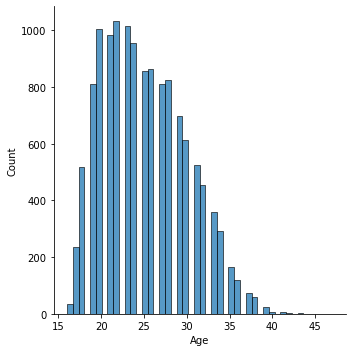

Skewness:  0.43886009950784666


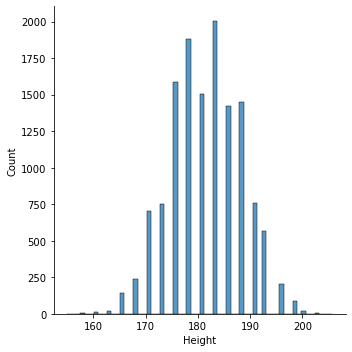

Skewness:  0.009084696499913439


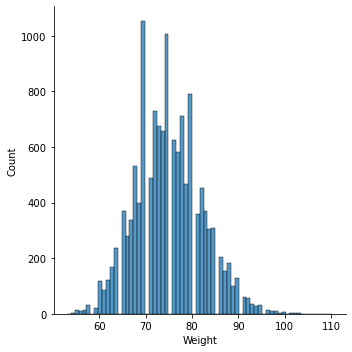

Skewness:  0.2475220828416305


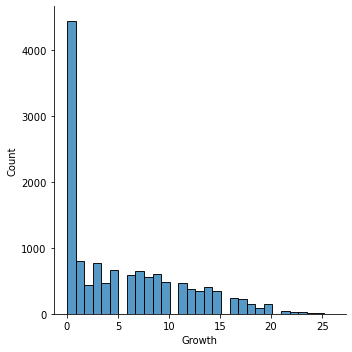

Skewness:  0.8045479924455688


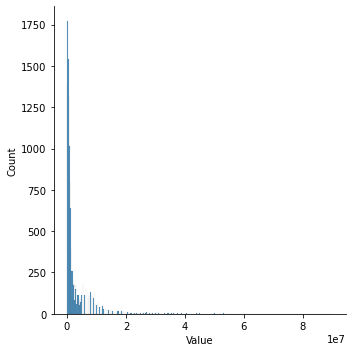

Skewness:  6.106805898959225


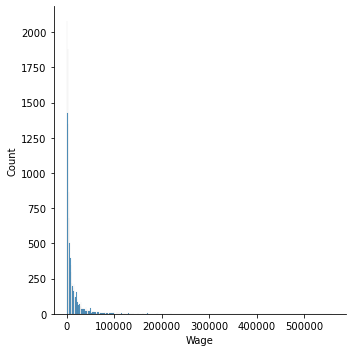

Skewness:  7.112622939179071


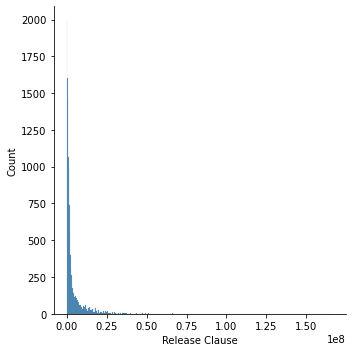

Skewness:  6.194629210984114


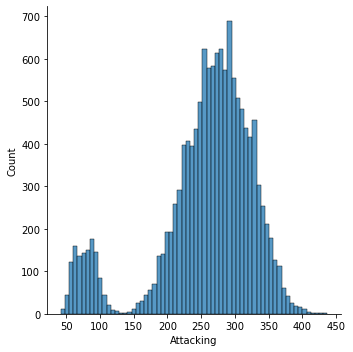

Skewness:  -1.1630096314722613


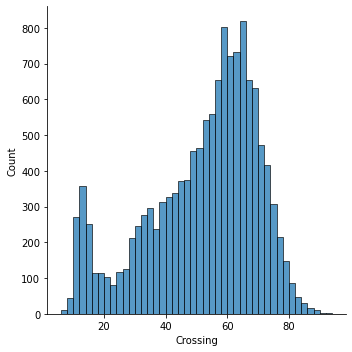

Skewness:  -0.7028684501466128


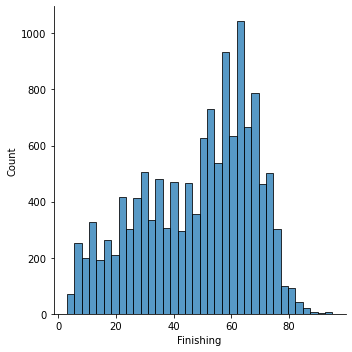

Skewness:  -0.44747981569480594


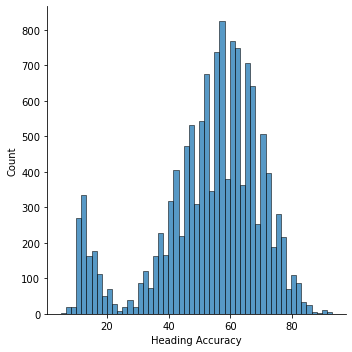

Skewness:  -0.90205256897634


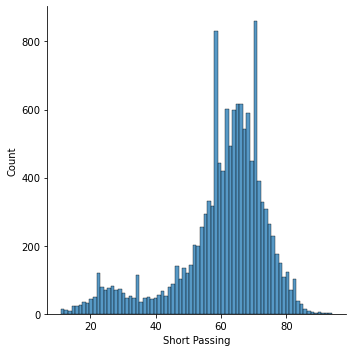

Skewness:  -1.2398583218385069


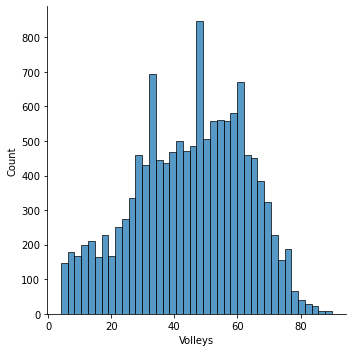

Skewness:  -0.2509486260959097


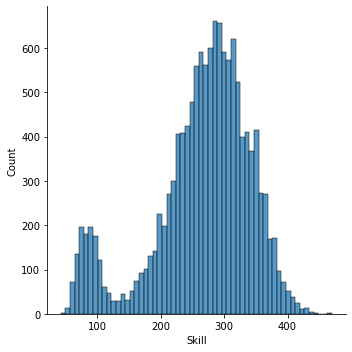

Skewness:  -0.8840098765369019


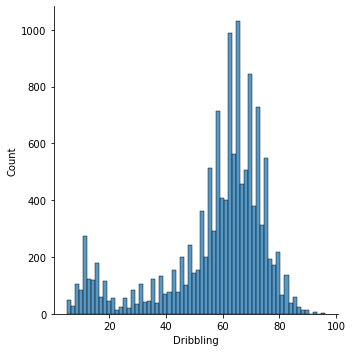

Skewness:  -1.2814942065860357


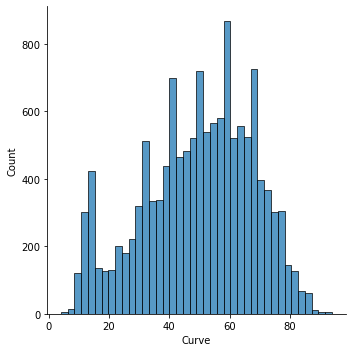

Skewness:  -0.3581040721913631


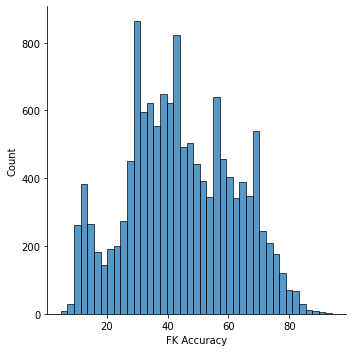

Skewness:  0.05756876850388518


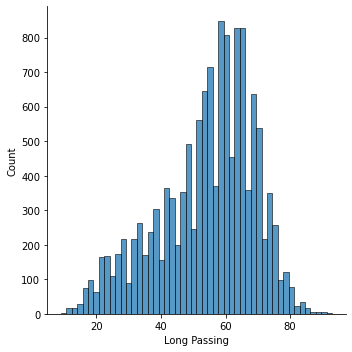

Skewness:  -0.6133165002715094


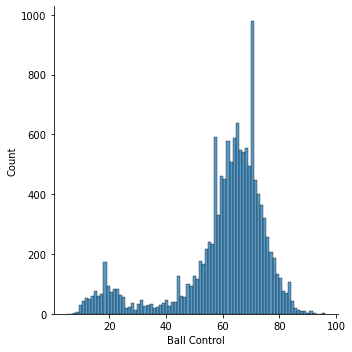

Skewness:  -1.486406399204735


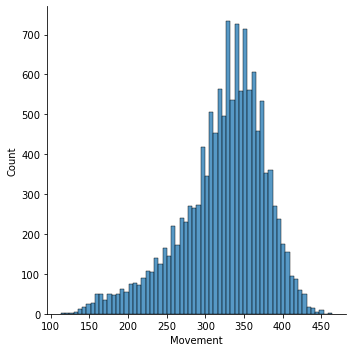

Skewness:  -0.8075388902921723


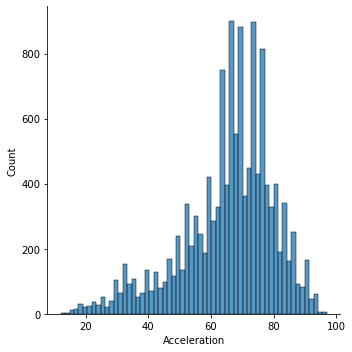

Skewness:  -0.8594645463136464


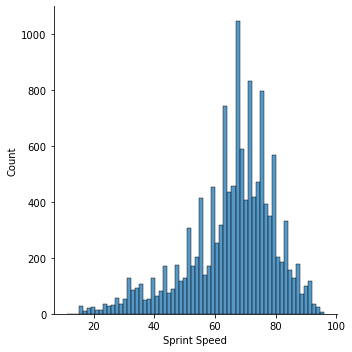

Skewness:  -0.880826894809112


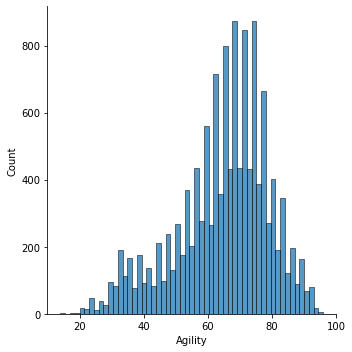

Skewness:  -0.6697283369828582


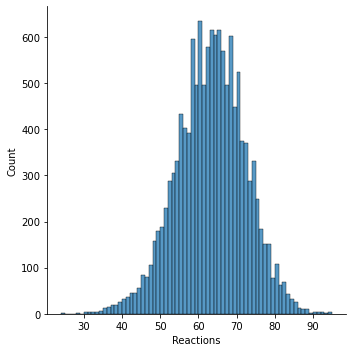

Skewness:  -0.17267844097244708


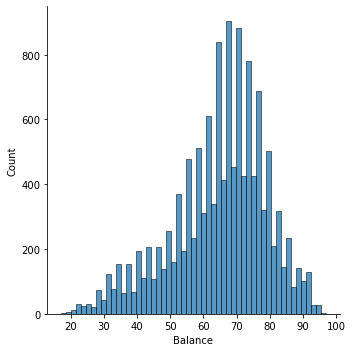

Skewness:  -0.6183807077425318


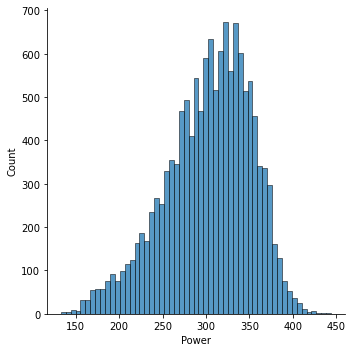

Skewness:  -0.5190065900329199


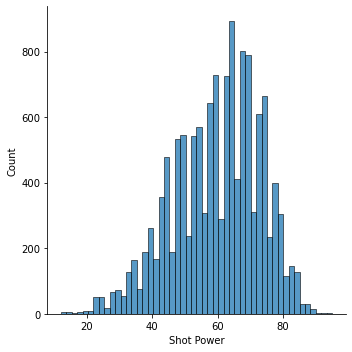

Skewness:  -0.4219905456426937


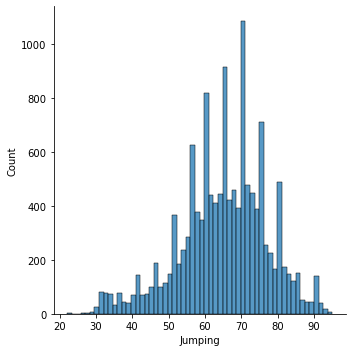

Skewness:  -0.45130164275980916


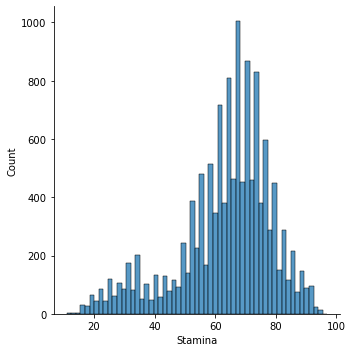

Skewness:  -0.8850224235142395


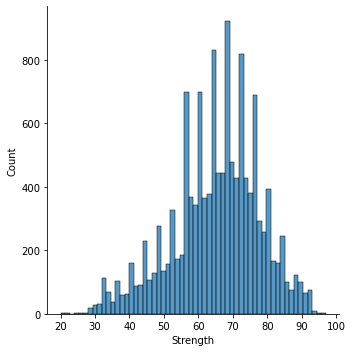

Skewness:  -0.44128542848339475


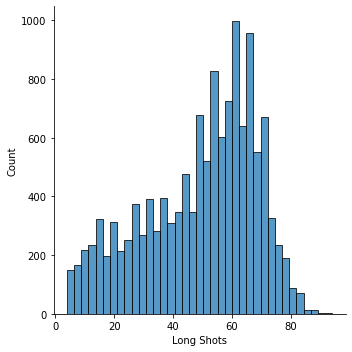

Skewness:  -0.5496340999592922


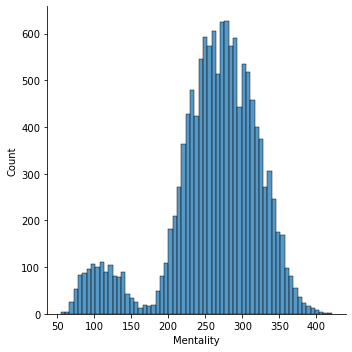

Skewness:  -0.9787809076816892


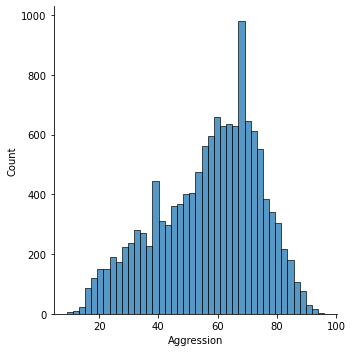

Skewness:  -0.4552205798795031


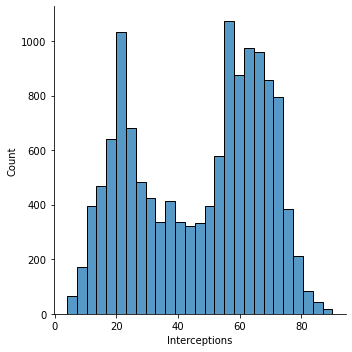

Skewness:  -0.24676200673201368


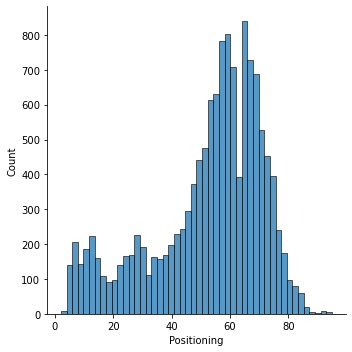

Skewness:  -0.8805219343446189


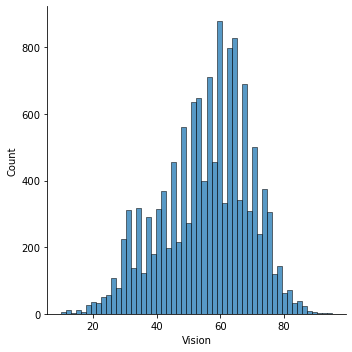

Skewness:  -0.4017620625090365


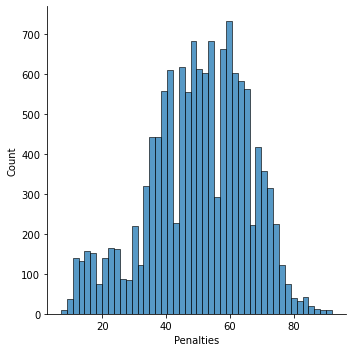

Skewness:  -0.41140533858932354


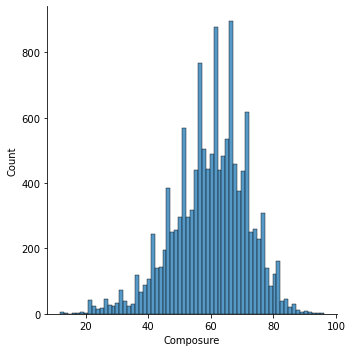

Skewness:  -0.5075130856636512


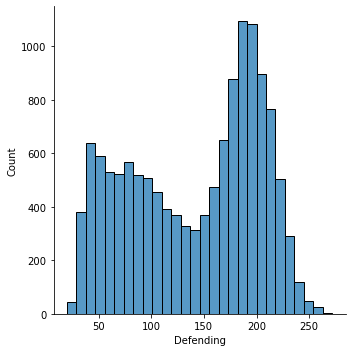

Skewness:  -0.2751426218739739


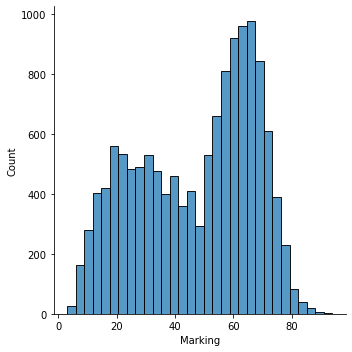

Skewness:  -0.31878988331312846


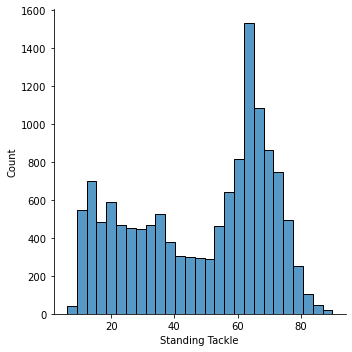

Skewness:  -0.3310139796396022


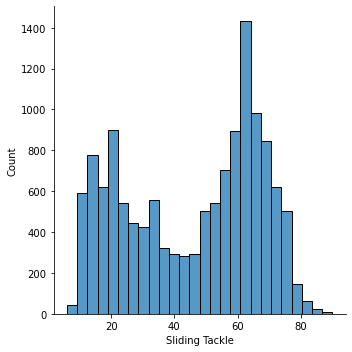

Skewness:  -0.2512752447100795


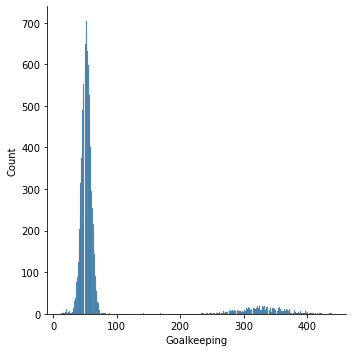

Skewness:  2.838906959101233


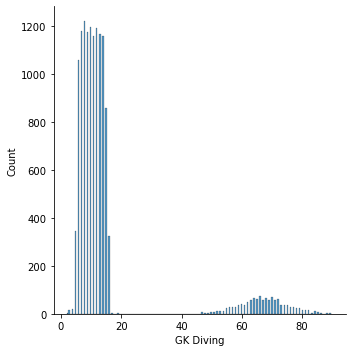

Skewness:  2.7355975013343996


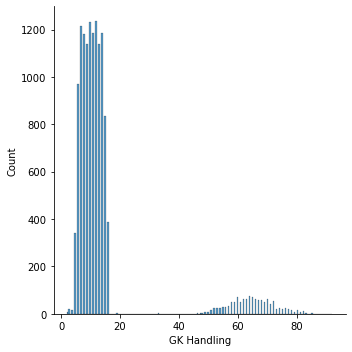

Skewness:  2.7218707448100905


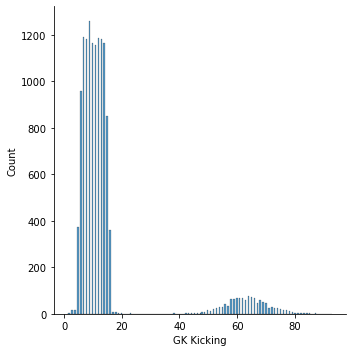

Skewness:  2.719082165681058


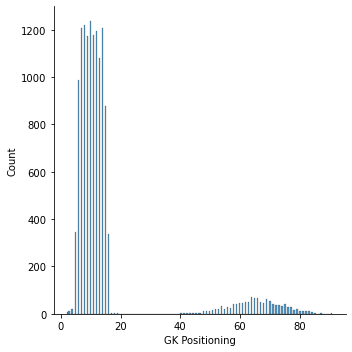

Skewness:  2.75453052264213


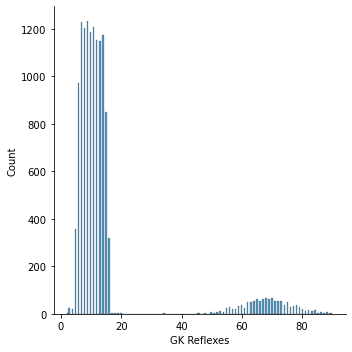

Skewness:  2.7477170333819396


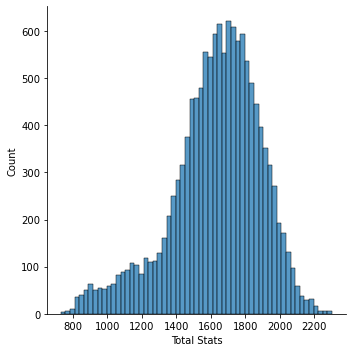

Skewness:  -0.6960495551847756


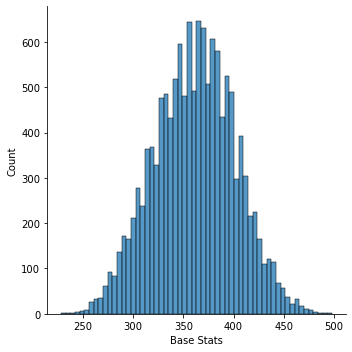

Skewness:  -0.03236243299131326


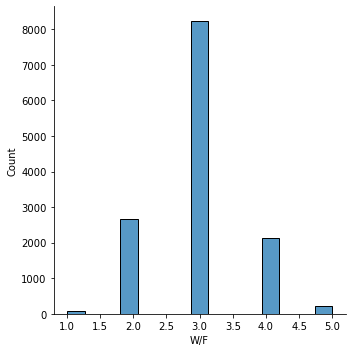

Skewness:  0.22862177979842907


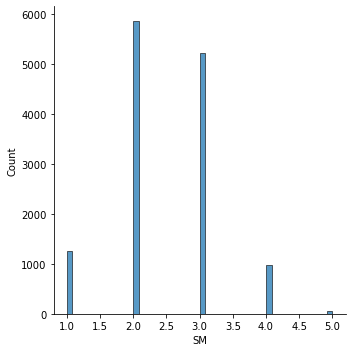

Skewness:  0.14106437054513585


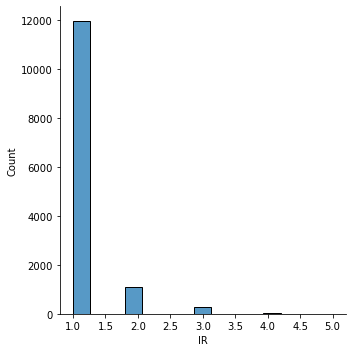

Skewness:  3.6569454032269637


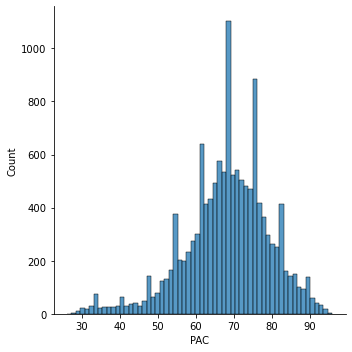

Skewness:  -0.5870044781240666


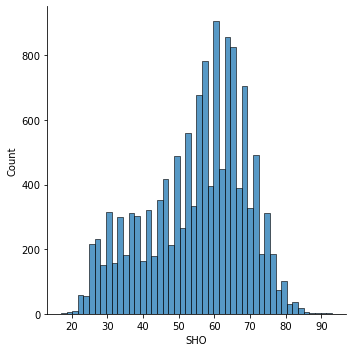

Skewness:  -0.46405715951755244


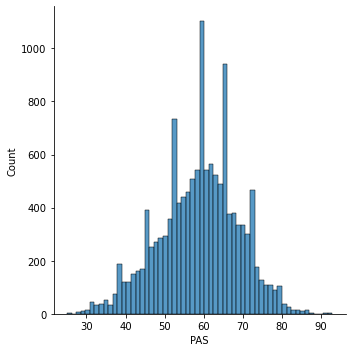

Skewness:  -0.23241503502510094


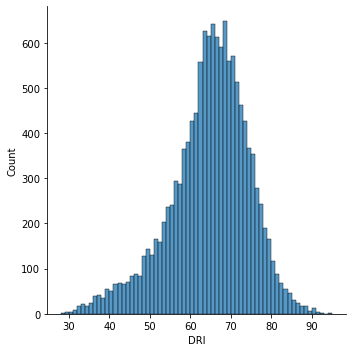

Skewness:  -0.5921588536183235


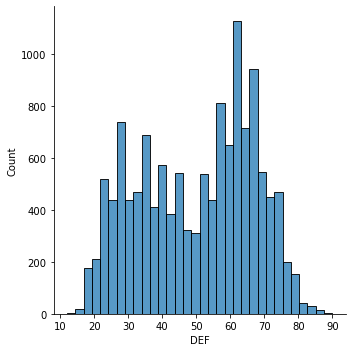

Skewness:  -0.18511583510135582


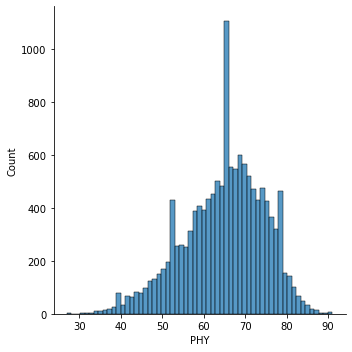

Skewness:  -0.45769761997172326


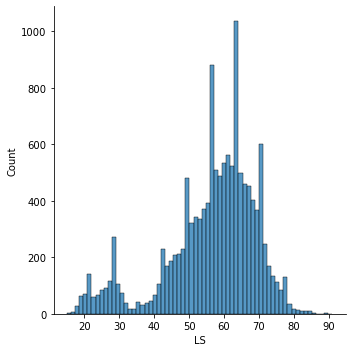

Skewness:  -0.9973464720651738


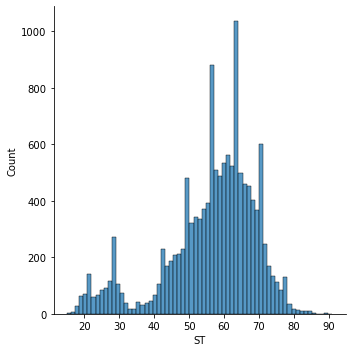

Skewness:  -0.9973464720651738


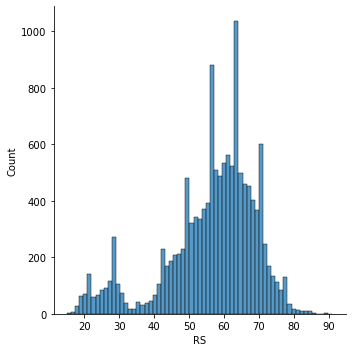

Skewness:  -0.9973464720651738


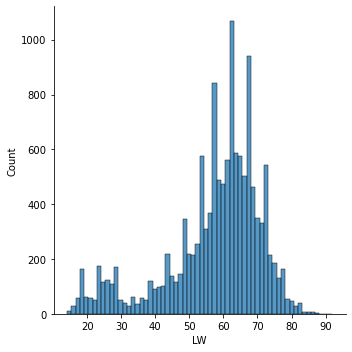

Skewness:  -1.1074168422385051


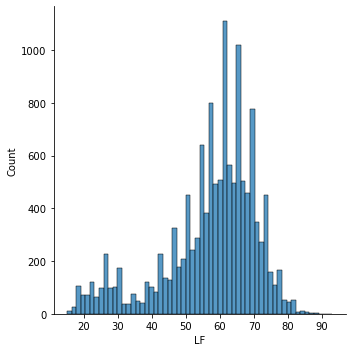

Skewness:  -1.0200772489127057


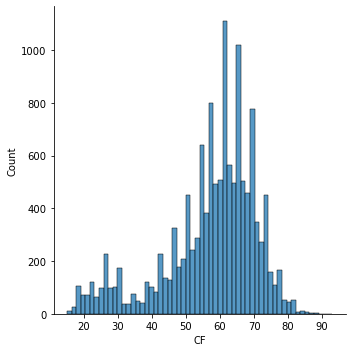

Skewness:  -1.0200772489127057


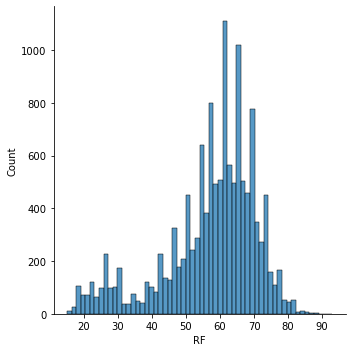

Skewness:  -1.0200772489127057


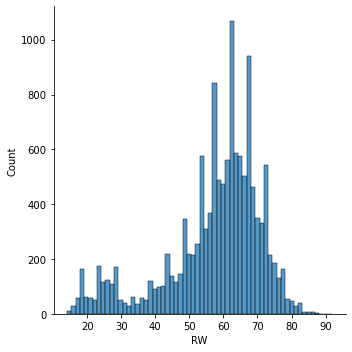

Skewness:  -1.1074168422385051


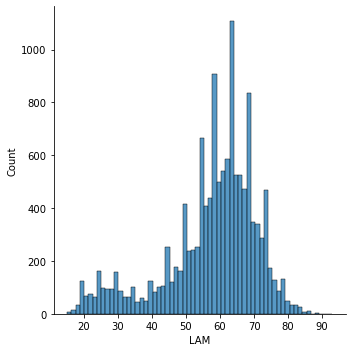

Skewness:  -1.027728712380639


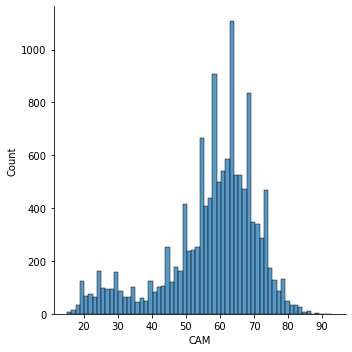

Skewness:  -1.027728712380639


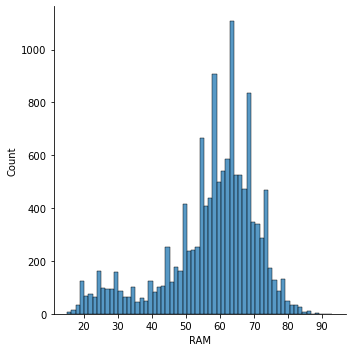

Skewness:  -1.027728712380639


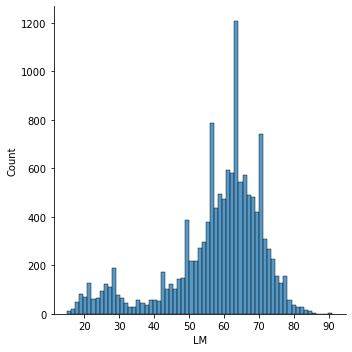

Skewness:  -1.1753203726480845


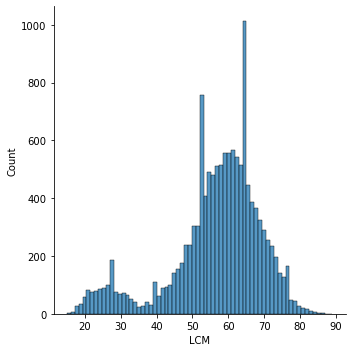

Skewness:  -1.031823304945578


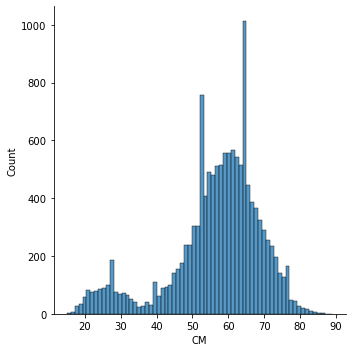

Skewness:  -1.031823304945578


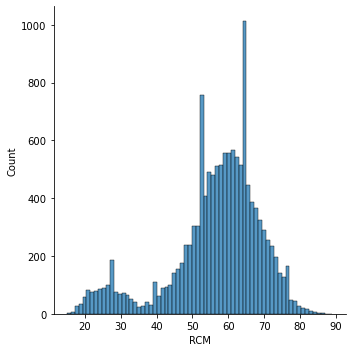

Skewness:  -1.031823304945578


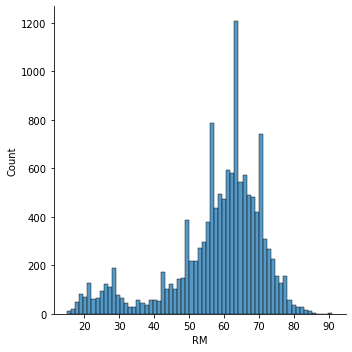

Skewness:  -1.1753203726480845


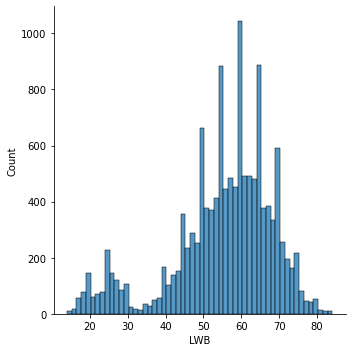

Skewness:  -0.9771681322317151


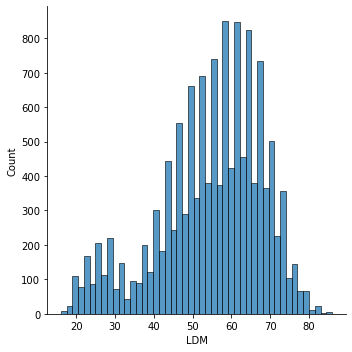

Skewness:  -0.6666019775681805


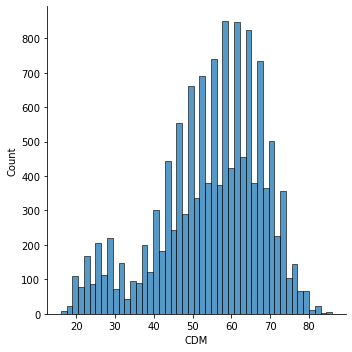

Skewness:  -0.6666019775681805


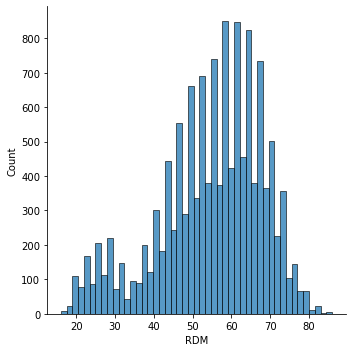

Skewness:  -0.6666019775681805


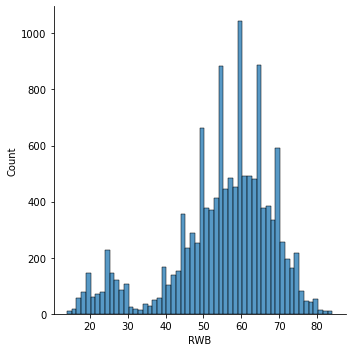

Skewness:  -0.9771681322317151


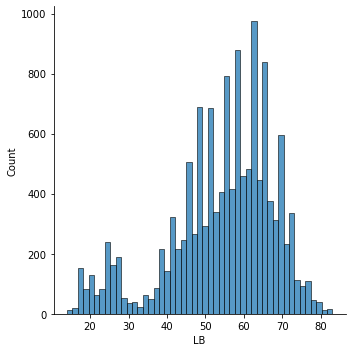

Skewness:  -0.8508100583780923


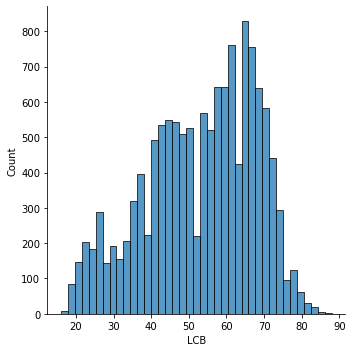

Skewness:  -0.41982966191865145


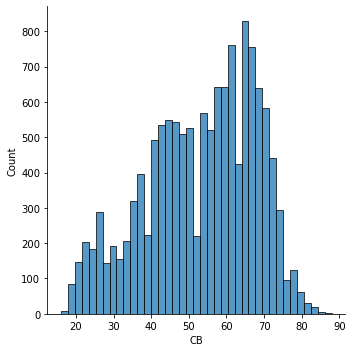

Skewness:  -0.41982966191865145


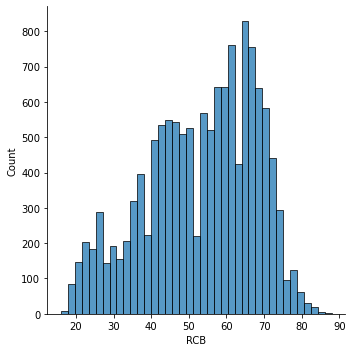

Skewness:  -0.41982966191865145


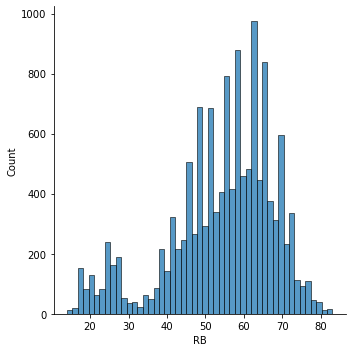

Skewness:  -0.8508100583780923


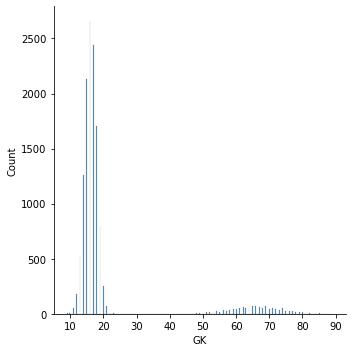

Skewness:  2.8441129951144966


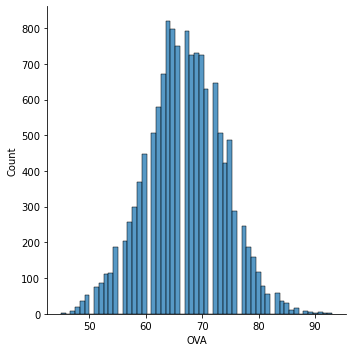

Skewness:  0.007880351477120367


In [ ]:
for col in df_num.columns: # Displaying Numerical Columns
    sns.displot(df_num[col])
    Skewnes = df_num[col].skew()
    plt.show()
    print("Skewness: ", Skewnes ) #Skewness shows how much each feature varies from the normal distribution

In [ ]:
df_num = df_num.drop("OVA", axis = 1)

In [ ]:
df_num_v0 = df_num.drop(["Weight"], axis = 1)
df_num.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13358 entries, 184383 to 254882
Data columns (total 86 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               13358 non-null  int64  
 1   Height            13358 non-null  float64
 2   Weight            13358 non-null  float64
 3   Growth            13358 non-null  int64  
 4   Value             13358 non-null  float64
 5   Wage              13358 non-null  float64
 6   Release Clause    13358 non-null  float64
 7   Attacking         13358 non-null  int64  
 8   Crossing          13358 non-null  int64  
 9   Finishing         13358 non-null  int64  
 10  Heading Accuracy  13358 non-null  int64  
 11  Short Passing     13358 non-null  int64  
 12  Volleys           13358 non-null  float64
 13  Skill             13358 non-null  int64  
 14  Dribbling         13358 non-null  int64  
 15  Curve             13358 non-null  float64
 16  FK Accuracy       13358 non-null  

In [ ]:
Best = []
for i in range(len(list(df["BP"]))):
    Best.append(list(df_num[list(df["BP"])[i]])[i])

In [ ]:
df_num_v0["Best Rated Position"]= Best
df_num_v0 = df_num_v0.drop(df_num_v0.columns[52:84], axis = 1)
df_num_v0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13358 entries, 184383 to 254882
Data columns (total 54 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  13358 non-null  int64  
 1   Height               13358 non-null  float64
 2   Growth               13358 non-null  int64  
 3   Value                13358 non-null  float64
 4   Wage                 13358 non-null  float64
 5   Release Clause       13358 non-null  float64
 6   Attacking            13358 non-null  int64  
 7   Crossing             13358 non-null  int64  
 8   Finishing            13358 non-null  int64  
 9   Heading Accuracy     13358 non-null  int64  
 10  Short Passing        13358 non-null  int64  
 11  Volleys              13358 non-null  float64
 12  Skill                13358 non-null  int64  
 13  Dribbling            13358 non-null  int64  
 14  Curve                13358 non-null  float64
 15  FK Accuracy          13358 non

df_num_v1 = df_num.drop(["Weight"], axis = 1)
df_num_v1 = df_num.drop(["Attacking", "Skill", "Movement", "Power", "Mentality", "Defending", "Goalkeeping"], axis = 1)

df_num_v2 = df_num.drop(["Weight"], axis = 1)
df_num_v2 = df_num.drop(df_num_v2.columns[6:40], axis = 1)

In [ ]:
#data["Attacking", "Skill", "Movement", "Power", "Mentality", "Defending", "Goalkeeping"]

# Correlation 

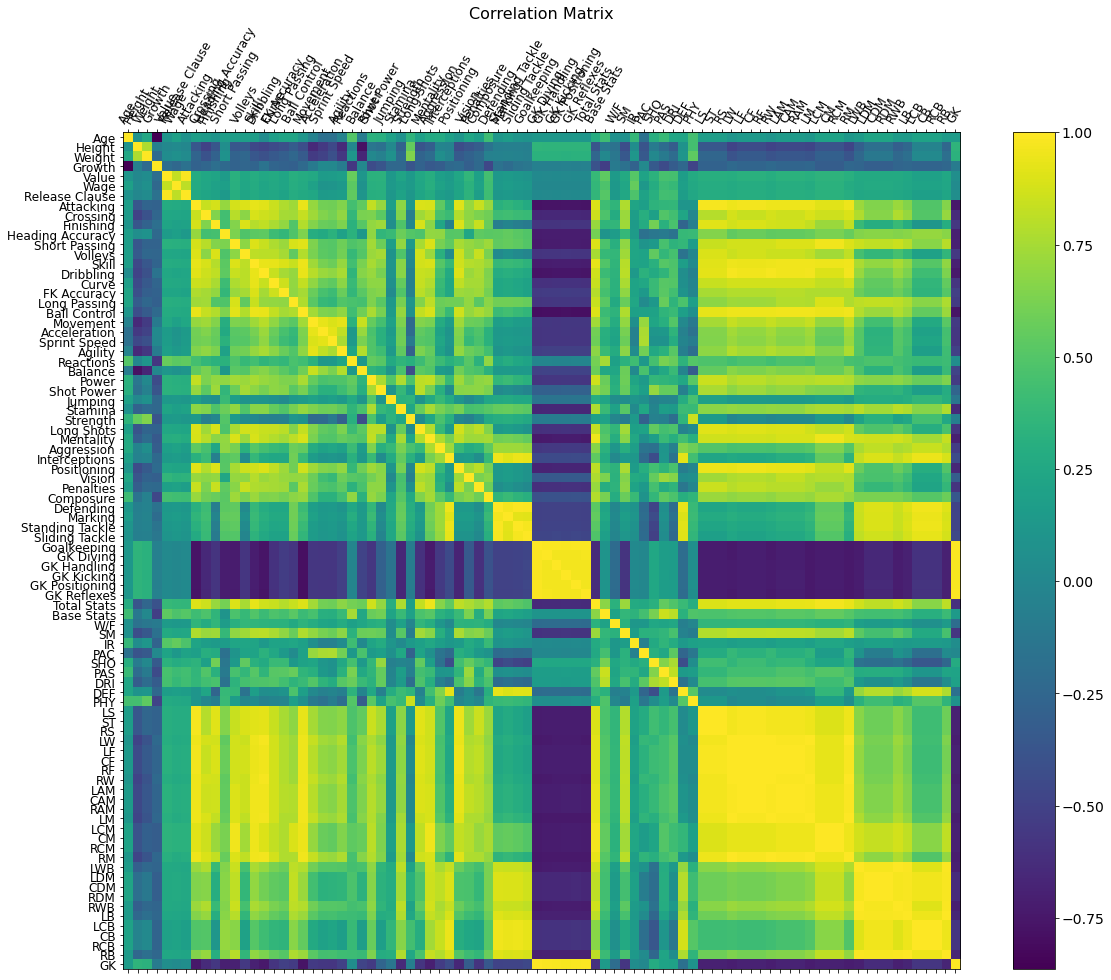

In [ ]:
f = plt.figure(figsize=(19, 15))
plt.matshow(df_num.corr(), fignum=f.number)
plt.xticks(range(df_num.shape[1]), df_num.columns, fontsize=12, rotation=60)
plt.yticks(range(df_num.shape[1]), df_num.columns, fontsize=12)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

# Models

In [ ]:
X = pd.concat([df_num, df_cat_dum], axis = 1)
y = df["OVA"]
X.head()

,Age,Height,Weight,Growth,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,IR,PAC,SHO,PAS,DRI,DEF,PHY,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,Nationality_Albania,Nationality_Algeria,Nationality_Angola,Nationality_Antigua &amp; Barbuda,Nationality_Argentina,Nationality_Armenia,Nationality_Aruba,Nationality_Australia,Nationality_Austria,Nationality_Azerbaijan,Nationality_Barbados,Nationality_Belarus,Nationality_Belgium,Nationality_Belize,Nationality_Benin,Nationality_Bolivia,Nationality_Bosnia Herzegovina,Nationality_Brazil,Nationality_Bulgaria,Nationality_Burkina Faso,Nationality_Burundi,Nationality_Cameroon,Nationality_Canada,Nationality_Cape Verde,Nationality_Central African Republic,Nationality_Chad,Nationality_Chile,Nationality_China PR,Nationality_Chinese Taipei,Nationality_Colombia,Nationality_Comoros,Nationality_Congo,Nationality_Costa Rica,Nationality_Croatia,Nationality_Cuba,Nationality_Curacao,Nationality_Cyprus,Nationality_Czech Republic,Nationality_DR Congo,Nationality_Denmark,Nationality_Dominican Republic,Nationality_Ecuador,Nationality_Egypt,Nationality_El Salvador,Nationality_England,Nationality_Equatorial Guinea,Nationality_Eritrea,Nationality_Estonia,Nationality_Faroe Islands,Nationality_Finland,Nationality_France,Nationality_Gabon,Nationality_Gambia,Nationality_Georgia,Nationality_Germany,Nationality_Ghana,Nationality_Gibraltar,Nationality_Greece,Nationality_Grenada,Nationality_Guam,Nationality_Guinea,Nationality_Guinea Bissau,Nationality_Guyana,Nationality_Haiti,Nationality_Honduras,Nationality_Hong Kong,Nationality_Hungary,Nationality_Iceland,Nationality_India,Nationality_Indonesia,Nationality_Iran,Nationality_Iraq,Nationality_Israel,Nationality_Italy,Nationality_Ivory Coast,Nationality_Jamaica,Nationality_Japan,Nationality_Jordan,Nationality_Kazakhstan,Nationality_Kenya,Nationality_Korea DPR,Nationality_Korea Republic,Nationality_Kosovo,Nationality_Latvia,Nationality_Lebanon,Nationality_Liberia,Nationality_Libya,Nationality_Liechtenstein,Nationality_Lithuania,Nationality_Luxembourg,Nationality_Macau,Nationality_Madagascar,Nationality_Malawi,Nationality_Malaysia,Nationality_Mali,Nationality_Malta,Nationality_Mauritania,Nationality_Mexico,Nationality_Moldova,Nationality_Montenegro,Nationality_Morocco,Nationality_Mozambique,Nationality_Namibia,Nationality_Netherlands,Nationality_New Caledonia,Nationality_New Zealand,Nationality_Niger,Nationality_Nigeria,Nationality_North Macedonia,Nationality_Northern Ireland,Nationality_Norway,Nationality_Palestine,Nationality_Panama,Nationality_Papua New Guinea,Nationality_Paraguay,Nationality_Peru,Nationality_Philippines,Nationality_Poland,Nationality_Portugal,Nationality_Puerto Rico,Nationality_Qatar,Nationality_Republic of Ireland,Nationality_Romania,Nationality_Russia,Nationality_Rwanda,Nationality_Saint Kitts and Nevis,Nationality_Saudi Arabia,Nationality_Scotland,Nationality_Senegal,Nationality_Serbia,Nationality_Sierra Leone,Nationality_Slovakia,Nationality_Slovenia,Nationality_South Africa,Nationality_South Sudan,Nationality_Spain,Nationality_Sudan,Nationality_Sweden,Nationality_Switzerland,Nationality_Syria,Nationality_São Tomé &amp; Príncipe,Nationality_Tanzania,Nationality_Thailand,Nationality_Togo,Nationality_Trinidad &amp; Tobago,Nationality_Tunisia,Nationality_Turkey,Nationality_Uganda,Nationality_Ukraine,Nationality_United Arab Emirates,Nationality_United States,Nationality_Uruguay,Nationality_Uzbekistan,Nationality_Venezuela,Nationality_Vietnam,Nationality_Wales,National

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


In [ ]:
def reg_analisis(predictions, y_test):
    print("MAE =  " + str(mean_absolute_error(y_test,predictions)))
    print("r2 =  " + str(r2_score(y_test, predictions)))
    print("RMSE = " + str((mean_squared_error(y_test,predictions))**0.5))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=88)
#Splitting data for Model

reg = LinearRegression().fit(X_train, y_train)
predictions = reg.predict(X_test)
reg_analisis(predictions, y_test)

MAE =  1.48839251548049
r2 =  0.9227253792976142
RMSE = 1.9162696250056868


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=88)
#Splitting data for Model

rfc = RandomForestRegressor(random_state = 88).fit(X_train, y_train)
predictions = rfc.predict(X_test).round()
reg_analisis(predictions, y_test)

MAE =  0.26422155688622756
r2 =  0.9919353197391645
RMSE = 0.6190585860273095


In [ ]:
predictions.round()

array([71., 71., 74., ..., 69., 73., 70.])

In [ ]:
X = pd.concat([df_num_v0, df_cat_dum], axis = 1)
y = df["OVA"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=88)
rfc = RandomForestRegressor(random_state = 88).fit(X_train, y_train)
predictions = rfc.predict(X_test).round()
reg_analisis(predictions, y_test)

MAE =  0.26422155688622756
r2 =  0.9919353197391645
RMSE = 0.6190585860273095
